In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("runner.csv", sep = "\t")
#df = pd.read_csv("imc.csv", sep = "\t")
#df = pd.read_csv("visits.csv", sep = "\t")

In [3]:
df.head()

,running_time,heartbeat
0,34.05,150
1,34.12,154
2,34.13,152
3,34.72,144
4,35.37,143


# Y = B0 + B1 * X1 + E

In [4]:
# O meu X vai ser o running time e o Y é o heartbeat

In [5]:
# O b0 é a constante do meu modelo, através do fit_intercept

In [6]:
model = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)

In [7]:
x = df['running_time'].to_numpy().reshape(-1, 1)

In [8]:
y = df['heartbeat'].to_numpy()

In [9]:
model.fit(x, y) # ele cria a reta da minha equação

LinearRegression()

In [10]:
print(model.score(x, y))
print(model.intercept_)
print(model.coef_)

0.4010707292485014
285.60791501472215
[-3.93871323]


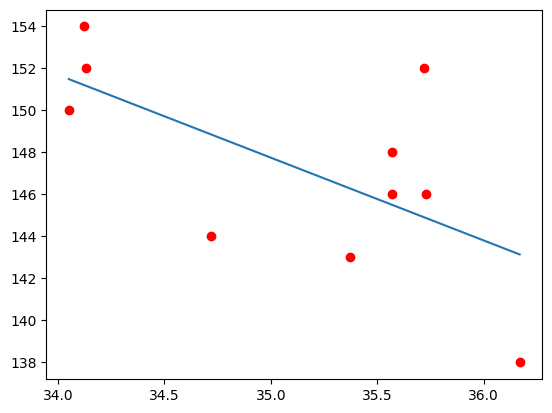

In [11]:
plt.scatter(x, y, color='red')
plt.plot(df[['running_time']].to_numpy(), model.predict(x))
plt.show()

In [12]:
# R2 = 0.4
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
# ORDINARY LEAST SQUARES = MÍNIMOS QUADRADOS ORDINÁRIOS

In [13]:
model.summary()

# Y = 285 - 3,9 * X
# R2 40%
# Tenho significância estatística

# VAMOS IMAGINAR QUE EU TENHA 1000 OBSERVAÇÕES
# DIVIDIR A MINHA AMOSTRA
# 500 OBSERVAÇÕES PARA GERAR O MODELO
# 500 OBSERVAÇÕES PARA TESTAR O MODELO

# r2 = 0.4
# r2 = 0.38

C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     5.357
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0493
Time:                        13:46:47   Log-Likelihood:                -26.992
No. Observations:                  10   AIC:                             57.98
Df Residuals:                       8   BIC:                             58.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        285.6079     59.769      4.779      0.001     147.780     423.436
x1            -3.9387      1.702     -2.315      0.049      -7.863      -0.015
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.241
Skew:                           0.225   Prob(JB):                        0.886
Kurtosis:                       2.386   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""